In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import BallTree

# Фрактальные графы и графы с географической привязкой данных

###1.	Реализовать алгоритм построения предфрактального графа 4-ой итерации с помощью операции замещения вершины затравкой (пример на рис. 1)

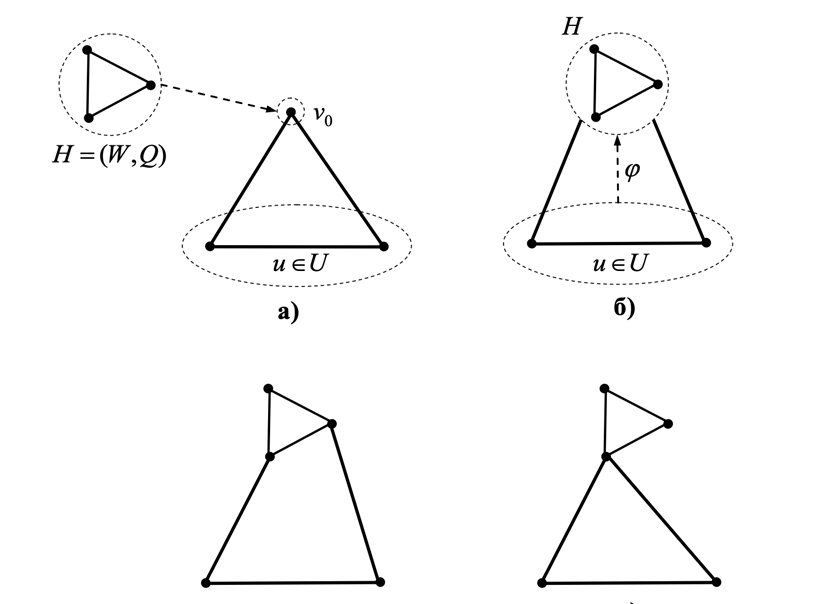

В качестве теоретических данных можно использовать материалы статей https://cyberleninka.ru/article/n/fraktalnye-i-predfraktalnye-grafy-osnovnye-opredeleniya-i-oboznacheniya/viewer и https://www.keldysh.ru/papers/2003/prep83/prep2003_83.html.

In [73]:
def predfractal(n_initial, iterations, p = 0.5):
  # создаем начальный граф
  g = nx.path_graph(n_initial)
  g.add_edge(0, n_initial-1)

  # создаем словарь атрибутов для каждой вершины в графе
  attributes = {}
  for i in range(n_initial):
      attributes[i] = iterations
  nx.set_node_attributes(g, attributes, 'size')

  prev = 0
  for i in range(iterations):
    # определяем текущий размер графа
    size = g.number_of_nodes()

    # проходим по каждой вершине в графе
    for node in range(prev, size):
      # получаем соседей текущей вершины
      embedded = list(g.neighbors(node))
      # определяем количество новых вершин, которые необходимо добавить
      num_nodes = g.number_of_nodes()

      # создаем новые вершины и добавляем их к графу
      new_nodes = []
      for new in range(num_nodes, num_nodes + len(embedded)):
          new_nodes.append((new, {'size': iterations - i}))
      g.add_nodes_from(new_nodes)

      # создаем ребра между новыми вершинами
      edges_to_add = []
      for i in range(num_nodes, num_nodes + len(embedded) - 1):
          edges_to_add.append((i, i + 1))
      g.add_edges_from(edges_to_add)

      # создаем ребра между новыми вершинами и соседями исходной вершины
      edges_to_add = []
      for i in range(num_nodes, num_nodes + len(embedded) - 1):
          edges_to_add.append((i, i + 1))
      g.add_edges_from(edges_to_add)
      g.add_edge(num_nodes, node)
      g.add_edge(num_nodes+len(embedded)-1, node)

    # обновляем предыдущий размер граф
    prev = size

  return g

In [77]:
def draw_fractal_graph():
    n_initial = int(input("Введите количество вершин начальной фигуры: "))
    iterations = int(input("Введите количество итераций: "))

    g = predfractal(n_initial, iterations)
    pos = nx.spring_layout(g)

    nx.draw(g, pos=pos, node_size=0)
    plt.show()

Введите количество вершин начальной фигуры: 3
Введите количество итераций: 0


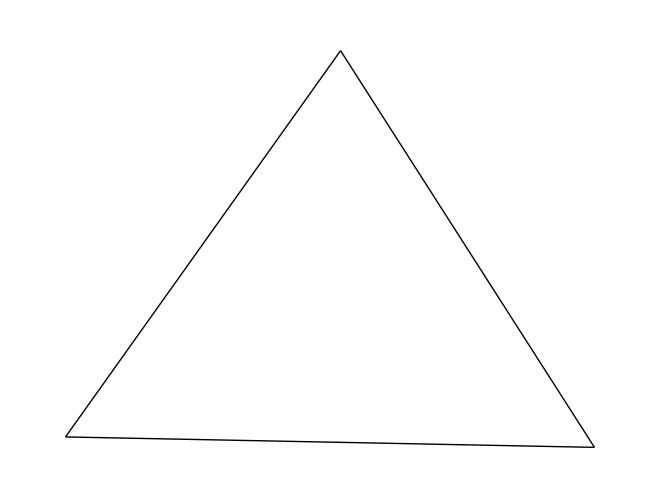

In [78]:
draw_fractal_graph()

Введите количество вершин начальной фигуры: 3
Введите количество итераций: 1


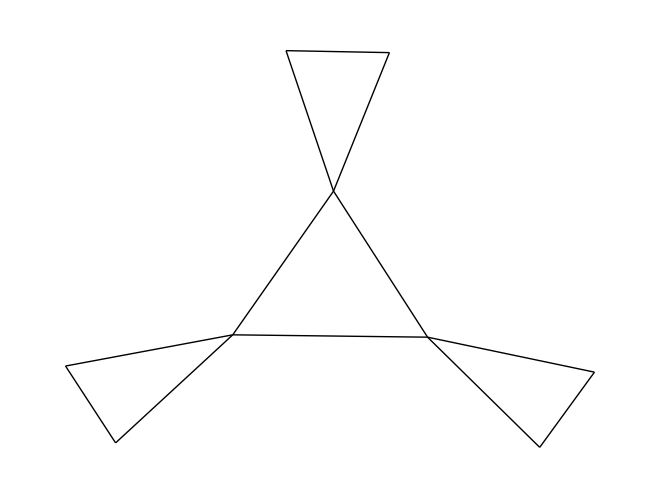

In [79]:
draw_fractal_graph()

Введите количество вершин начальной фигуры: 3
Введите количество итераций: 4


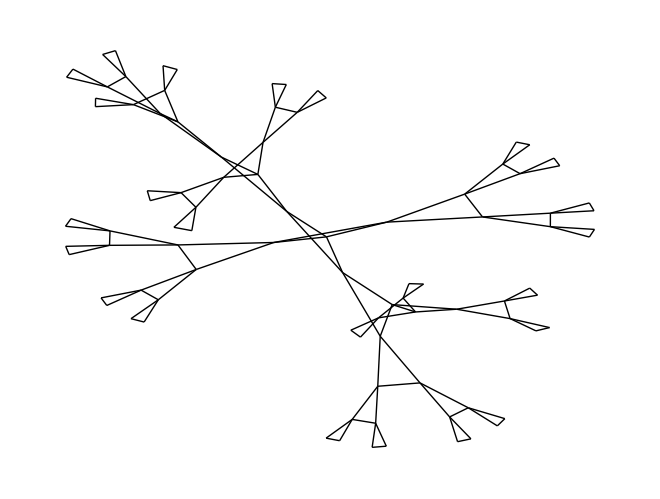

In [81]:
draw_fractal_graph()

Введите количество вершин начальной фигуры: 3
Введите количество итераций: 5


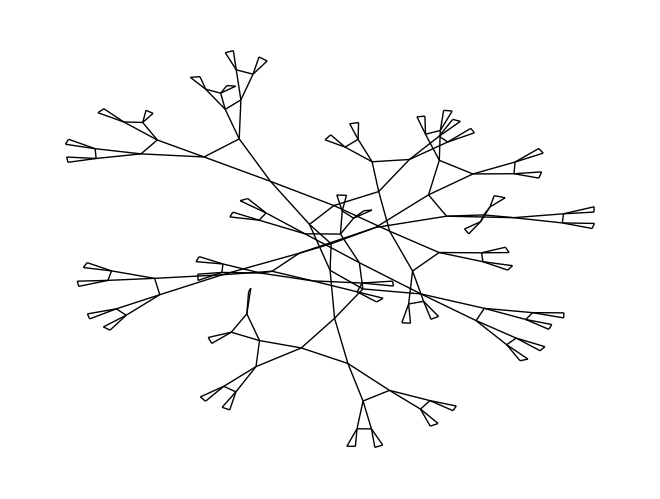

In [82]:
draw_fractal_graph()

### 2.	Выбрать (скачать) самостоятельно датасет (например, с kaggle.com, данные о дорожной сети, транспортных узлах и т.д.) и построить граф с географической привязкой данных.

Датасет nyc-taxi-trip-duration.csv содержит информацию о поездках на такси в Нью-Йорке, включая данные о времени начала поездки, местоположении начальной и конечной точек, количестве пассажиров и другие характеристики.

Для построения графа следует воспользоваться информацией о координатах широты и долготы. В этом датасете у нас есть столбцы pickup_longitude, pickup_latitude, dropoff_longitude и dropoff_latitude, которые могут быть использованы для определения местоположения начала и конца каждой поездки.

In [4]:
df = pd.read_csv('drive/MyDrive/МОСИС/nyc-taxi-trip-duration.csv')
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
# удалим ненужные колонки
columns_to_drop = ['id', 'vendor_id', 'pickup_datetime', 'passenger_count', 'store_and_fwd_flag']
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.988129,40.732029,-73.990173,40.756680
1,-73.964203,40.679993,-73.959808,40.655403
2,-73.997437,40.737583,-73.986160,40.729523
3,-73.956070,40.771900,-73.986427,40.730469
4,-73.970215,40.761475,-73.961510,40.755890


In [11]:
# сократим датасет до 1000 строк

df = df.sample(n=100, random_state=42)

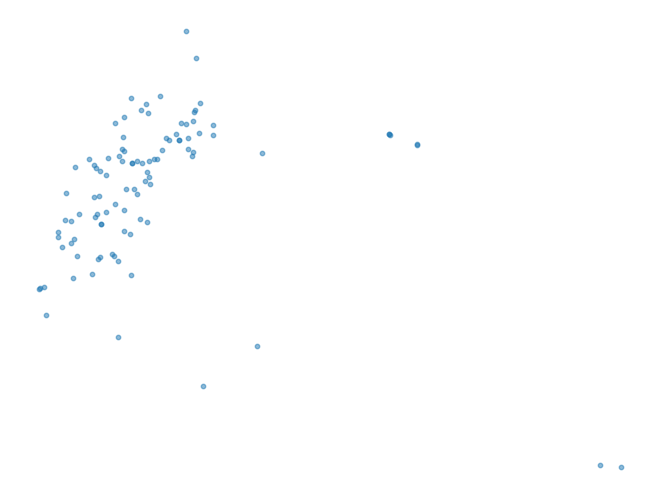

In [19]:
g = nx.Graph()
g.add_nodes_from(range(df.shape[0]))
pos = [(df['pickup_longitude'].iloc[i],df['pickup_latitude'].iloc[i]) for i in range(df.shape[0])]

nx.draw(g, pos = pos, node_size=10, alpha=0.5)

###3.	Для решения задания использовать методы библиотеки networkx (источник: networkx.org). Реализовать алгоритм создания случайного, полносвязного графов и графа ближайшего соседства для узлов, сгенерированных на основе географической привязки.

In [33]:
def random_graph(g, p=0.5, max_iter=100):
    new_g = g.copy()
    num_nodes = new_g.number_of_nodes()
    for _ in range(max_iter):
        node_1 = np.random.randint(num_nodes)
        node_2 = np.random.randint(num_nodes)
        if node_1 != node_2 and not new_g.has_edge(node_1, node_2):
            proba = np.random.uniform()
            if proba < p:
                new_g.add_edge(node_1, node_2)
    return new_g

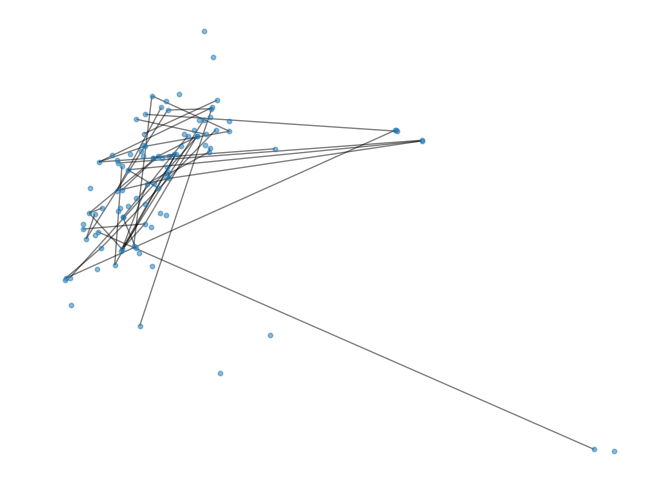

In [37]:
new_random_g = random_graph(g)
nx.draw(new_random_g, pos=pos, node_size=10, alpha=0.5)
plt.show()

In [38]:
def fully_connected(g):
    new_g = g.copy()
    nodes = list(new_g.nodes)
    for i in range(len(nodes) - 1):
        for j in range(i + 1, len(nodes)):
            if not new_g.has_edge(nodes[i], nodes[j]):
                new_g.add_edge(nodes[i], nodes[j])
    return new_g

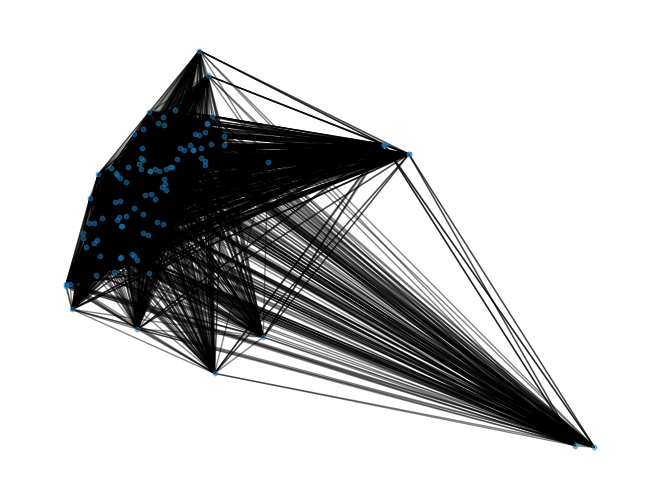

In [39]:
new_fully_connected_g = fully_connected(g)
nx.draw(new_fully_connected_g, pos=pos, node_size=10, alpha=0.5)
plt.show()

In [46]:
def closest_n(g):
  new_g = g.copy()
  for i in range(new_g.number_of_nodes()):
    node_emb = df.apply(lambda x: abs(df.iloc[i]['pickup_longitude'] -  x['pickup_longitude'])+ abs(df.iloc[i]['pickup_latitude'] -  x['pickup_latitude']), axis = 1).sort_values().index[1]
    new_g.add_edge(i, node_emb)
  return new_g

IndexError: list index out of range

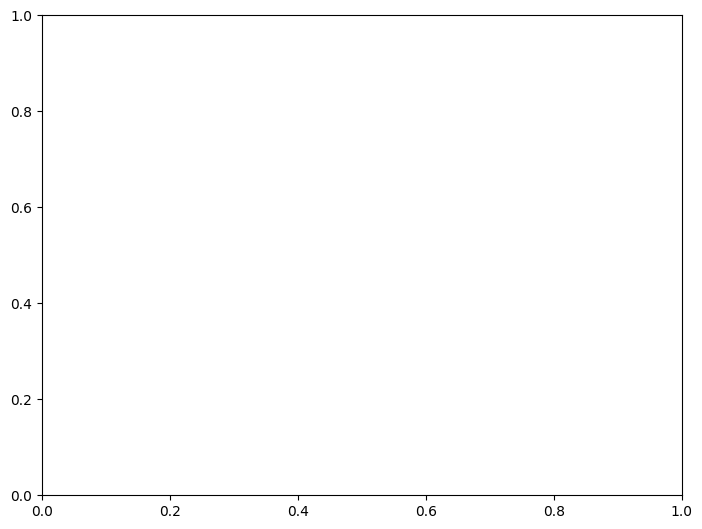

In [58]:
new_g = closest_n(g)
nx.draw(new_g, pos=pos, node_size=10, alpha=0.5)
plt.show()

###4.	Рассчитать среднюю степень вершины, средний минимальный путь и диаметр полученного графа

In [48]:
def mean_degree(g):
  degrees = dict(random_g.degree()).values()
  return sum(degrees)/ len(degrees)

In [59]:
random_g = random_graph(g, p=0.8)
fully_conn_g = fully_connected(g)
closest_g = closest_n(g)
graphs = {'Случайный граф': random_g,
          'Полносвязный граф': fully_conn_g,
          'Граф ближайшего соседства': closest_g}

for graph in graphs.keys():
    try:
        print(f'{graph}\nСредняя степень вершины: {mean_degree(graphs[graph]):.3f}\nСредний минимальный путь: {nx.average_shortest_path_length(graphs[graph]):.3f}\nДиаметр: {nx.diameter(graphs[graph])}')
    except:
        avgs = 0
        num = 0
        for C in (graphs[graph].subgraph(c).copy() for c in nx.connected_components(graphs[graph])):
            avgs += nx.average_shortest_path_length(C)
            num += 1
        avgs /= num
        print(f'{graph}\nСредняя степень вершины: {mean_degree(graphs[graph]):.3f}\nСредний минимальный путь: {avgs:.3f}\nДиаметр нельзя рассчитать')
    print('\n')

Случайный граф
Средняя степень вершины: 1.580
Средний минимальный путь: 0.797
Диаметр нельзя рассчитать


Полносвязный граф
Средняя степень вершины: 1.580
Средний минимальный путь: 1.000
Диаметр: 1


Граф ближайшего соседства
Средняя степень вершины: 1.580
Средний минимальный путь: 1.109
Диаметр нельзя рассчитать




###5.	Проанализировать и выявить закономерности при их наличии (например, специфика регионов и т.п.)

In [63]:
components = list(nx.connected_components(closest_g))
for node in closest_g.nodes():
  closest_g.nodes[node]['color'] = 0
  for i in range(len(components)):
    if node in components[i]:
      closest_g.nodes[node]['color'] = i*100

In [60]:
img = plt.imread('drive/MyDrive/МОСИС/NY.jpg')

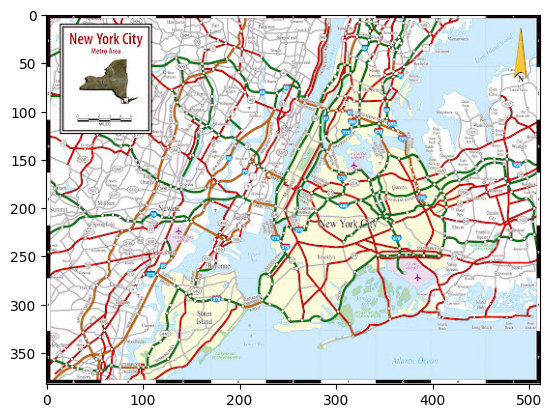

In [64]:
plt.imshow(img)

KeyError: 100

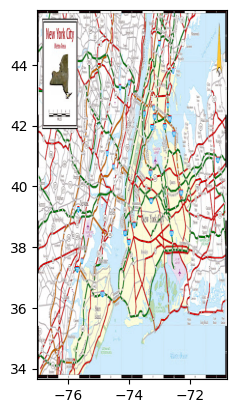

In [67]:
plt.imshow(img, zorder=0, extent=[df['dropoff_longitude'].min()-3, df['dropoff_longitude'].max()+3, df['pickup_latitude'].min()-7, df['pickup_latitude'].max()+5])
nx.draw(closest_g, pos = pos, node_size = 20, edge_color = 'red', width = 3, node_color = [closest_g.nodes[n]['color'] for n in range(closest_g.number_of_nodes())], cmap=plt.cm.viridis)
plt.show()

IndexError: list index out of range

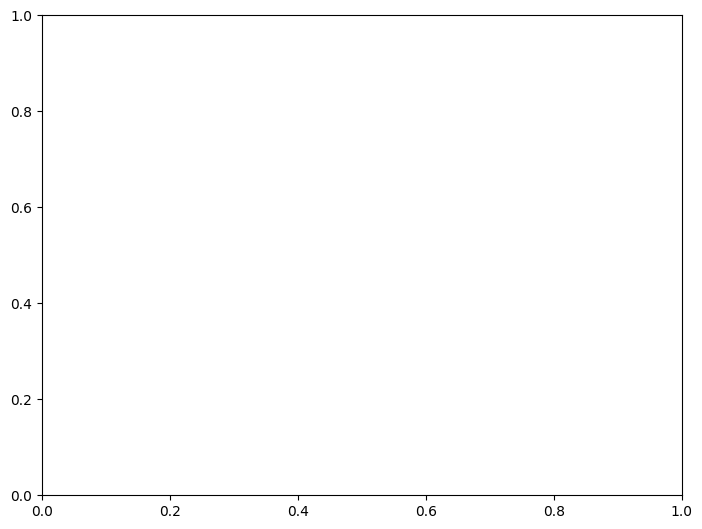

In [69]:
nx.draw(closest_g, pos = pos, node_size = 10)